In [95]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from catboost import CatBoostClassifier
import lightgbm as lgb

In [96]:
data = pd.read_csv('in-vehicle-coupon-recommendation.csv')

In [97]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [98]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [100]:
data.drop(['car'], axis=1, inplace=True)

In [101]:
data['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [102]:
data['age'].replace("below21", "18", inplace=True)
data['age'].replace("50plus", "53", inplace=True)

In [103]:
data['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [104]:
data_d = data # for further analysis

In [105]:
label_enc = LabelEncoder()
data['destination'] = label_enc.fit_transform(data['destination'])
data['passanger'] = label_enc.fit_transform(data['passanger'])
data['weather'] = label_enc.fit_transform(data['weather'])
data['time'] = label_enc.fit_transform(data['time'])
data['coupon'] = label_enc.fit_transform(data['coupon'])
data['expiration'] = label_enc.fit_transform(data['expiration'])
data['gender'] = label_enc.fit_transform(data['gender'])
data['maritalStatus'] = label_enc.fit_transform(data['maritalStatus'])
data['education'] = label_enc.fit_transform(data['education'])
data['occupation'] = label_enc.fit_transform(data['occupation'])
data['income'] = label_enc.fit_transform(data['income'])

In [106]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,55,2,4,0,0,21,3,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,1,1,2,80,0,2,1,0,21,3,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,1,1,2,80,0,1,1,0,21,3,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,1,1,2,80,2,2,1,0,21,3,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,1,1,2,80,2,2,0,0,21,3,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,1,1,2,80,3,4,1,0,21,3,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,1,1,2,55,2,1,0,0,21,3,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,1,2,2,80,0,4,1,0,21,3,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,1,2,2,80,0,1,1,0,21,3,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,1,2,2,80,0,0,0,0,21,3,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [107]:
data.describe()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,maritalStatus,has_children,education,occupation,income,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,0.994245,0.672895,1.698439,63.301798,2.236676,2.050221,0.440949,0.486676,1.709398,0.414144,2.590744,14.309208,3.301876,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,0.710393,0.941975,0.633597,19.154486,1.439508,1.348546,0.496520,0.499842,0.832917,0.492593,1.882300,7.992078,2.462862,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,55.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,6.000000,1.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,2.000000,80.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,16.000000,3.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,80.000000,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,5.000000,22.000000,5.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,2.000000,3.000000,2.000000,80.000000,4.000000,4.000000,1.000000,1.000000,4.000000,1.000000,5.000000,24.000000,8.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
data['temperature'].unique()

array([55, 80, 30])

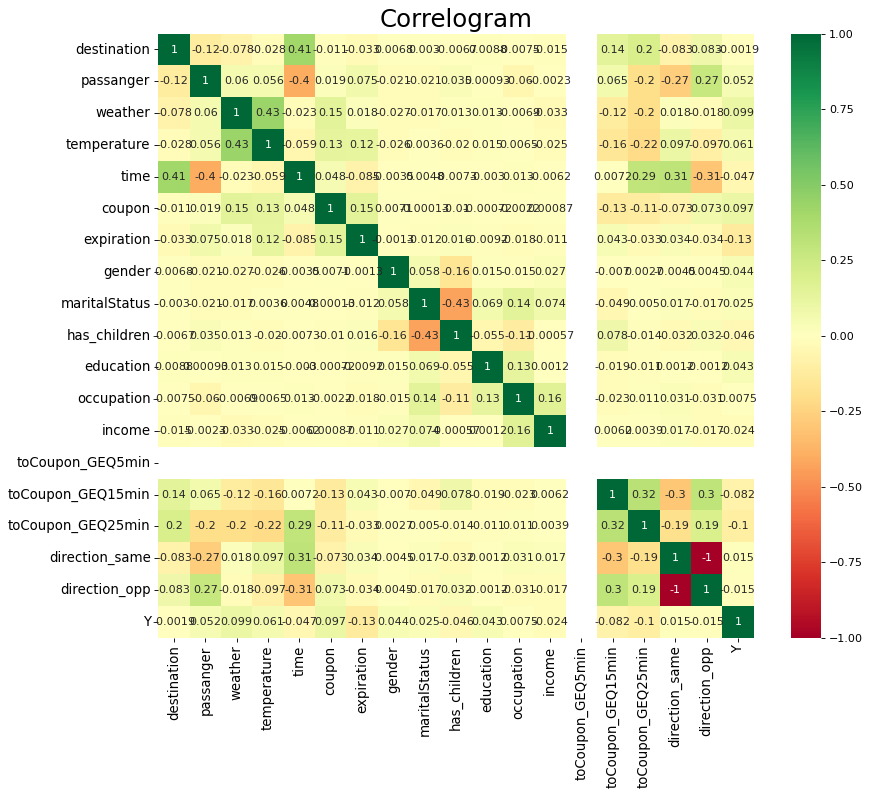

In [109]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

=====================================================

In [84]:
X = data[['destination', 'passanger', 'weather','temperature',
          'time', 'coupon', 'expiration','gender', 'maritalStatus',
          'has_children', 'education','occupation', 'income']]
y = data['Y']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    

In [110]:
data_new = data_d.drop(['direction_same','Y'], axis=1)
data_dum = pd.get_dummies(data_new)
data_dum.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'maritalStatus', 'has_children', 'education',
       'occupation', 'income', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_opp', 'age_18', 'age_21', 'age_26',
       'age_31', 'age_36', 'age_41', 'age_46', 'age_53', 'Bar_1~3', 'Bar_4~8',
       'Bar_gt8', 'Bar_less1', 'Bar_never', 'CoffeeHouse_1~3',
       'CoffeeHouse_4~8', 'CoffeeHouse_gt8', 'CoffeeHouse_less1',
       'CoffeeHouse_never', 'CarryAway_1~3', 'CarryAway_4~8', 'CarryAway_gt8',
       'CarryAway_less1', 'CarryAway_never', 'RestaurantLessThan20_1~3',
       'RestaurantLessThan20_4~8', 'RestaurantLessThan20_gt8',
       'RestaurantLessThan20_less1', 'RestaurantLessThan20_never',
       'Restaurant20To50_1~3', 'Restaurant20To50_4~8', 'Restaurant20To50_gt8',
       'Restaurant20To50_less1', 'Restaurant20To50_never'],
      dtype='object')

In [111]:
X_dum = data_dum

In [112]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_dum, y, test_size=0.2, random_state=42)    

# Using Random Forest in a dataset has two major problems:

    1. Random Forest does not perform well when features are monotonic transformations of other features (this makes the trees of the forest less independent from each other).
    
    2. The same happens when you have more features than samples: random forest will probably overfit the dataset, and you will have a poor out of bag performance.
    
When using PCA you get rid of these two problems that are lowering the performance of Random Forest:

    1 .you reduce the number of features.
    
    2 . you get rid of collinear features. (all collinear features will end up in a single PCA component).
    
# But actually Random Forest get better score on not scaled data

In [17]:
"""pca = PCA(n_components=8)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)"""

In [23]:
"""sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)"""

=======================================label encoder ===========================================

In [35]:
rf = RandomForestClassifier()

In [36]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
pred = rf.predict(X_test)

In [38]:
print("Classification Report: \n", classification_report(y_test, pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.59      0.62      1128
           1       0.70      0.75      0.72      1409

    accuracy                           0.68      2537
   macro avg       0.68      0.67      0.67      2537
weighted avg       0.68      0.68      0.68      2537



In [39]:
roc_auc_score(y_test, pred)

0.6703898821658135

=======================================get_dummies ===========================================

In [113]:
rf = RandomForestClassifier()

In [114]:
rf.fit(X_train_d, y_train_d)

RandomForestClassifier()

In [115]:
pred = rf.predict(X_test_d)

In [116]:
print("Classification Report: \n", classification_report(y_test, pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.67      0.71      1128
           1       0.76      0.83      0.79      1409

    accuracy                           0.76      2537
   macro avg       0.76      0.75      0.75      2537
weighted avg       0.76      0.76      0.75      2537



In [117]:
roc_auc_score(y_test, pred)

0.7469239035783136

<p style='color:red'> Seems like RandomForest and i guess a lot of classificators get better results with get_dummies than with label_encoder. As it is in theory </p>

# cat boost


In [118]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_dum, y, test_size=0.2, random_state=42)

In [119]:
cat_features = list(range(0, X.shape[1]))

In [120]:
clf = CatBoostClassifier()

In [121]:
clf.fit(X_train_cat, y_train_cat, 
        cat_features=cat_features, 
        eval_set=(X_test_cat, y_test_cat))

Learning rate set to 0.056166
0:	learn: 0.6820078	test: 0.6823028	best: 0.6823028 (0)	total: 9.86ms	remaining: 9.85s
1:	learn: 0.6725875	test: 0.6733075	best: 0.6733075 (1)	total: 19.5ms	remaining: 9.71s
2:	learn: 0.6634667	test: 0.6647088	best: 0.6647088 (2)	total: 28.1ms	remaining: 9.34s
3:	learn: 0.6560166	test: 0.6575572	best: 0.6575572 (3)	total: 39.7ms	remaining: 9.88s
4:	learn: 0.6484949	test: 0.6508178	best: 0.6508178 (4)	total: 48.4ms	remaining: 9.64s
5:	learn: 0.6422576	test: 0.6449408	best: 0.6449408 (5)	total: 56.3ms	remaining: 9.32s
6:	learn: 0.6381660	test: 0.6408766	best: 0.6408766 (6)	total: 65.2ms	remaining: 9.25s
7:	learn: 0.6333716	test: 0.6362309	best: 0.6362309 (7)	total: 73.6ms	remaining: 9.13s
8:	learn: 0.6287420	test: 0.6319870	best: 0.6319870 (8)	total: 83.5ms	remaining: 9.2s
9:	learn: 0.6237891	test: 0.6275694	best: 0.6275694 (9)	total: 92.2ms	remaining: 9.13s
10:	learn: 0.6197861	test: 0.6240705	best: 0.6240705 (10)	total: 102ms	remaining: 9.17s
11:	learn: 0.

108:	learn: 0.5260152	test: 0.5511131	best: 0.5511131 (108)	total: 1.02s	remaining: 8.31s
109:	learn: 0.5252534	test: 0.5507309	best: 0.5507309 (109)	total: 1.02s	remaining: 8.3s
110:	learn: 0.5250408	test: 0.5506712	best: 0.5506712 (110)	total: 1.04s	remaining: 8.32s
111:	learn: 0.5245156	test: 0.5504428	best: 0.5504428 (111)	total: 1.05s	remaining: 8.32s
112:	learn: 0.5240964	test: 0.5502281	best: 0.5502281 (112)	total: 1.06s	remaining: 8.32s
113:	learn: 0.5237052	test: 0.5499205	best: 0.5499205 (113)	total: 1.07s	remaining: 8.33s
114:	learn: 0.5230764	test: 0.5494375	best: 0.5494375 (114)	total: 1.08s	remaining: 8.32s
115:	learn: 0.5226751	test: 0.5491553	best: 0.5491553 (115)	total: 1.09s	remaining: 8.33s
116:	learn: 0.5220221	test: 0.5483709	best: 0.5483709 (116)	total: 1.1s	remaining: 8.32s
117:	learn: 0.5215718	test: 0.5481775	best: 0.5481775 (117)	total: 1.11s	remaining: 8.32s
118:	learn: 0.5206641	test: 0.5476278	best: 0.5476278 (118)	total: 1.12s	remaining: 8.31s
119:	learn: 

201:	learn: 0.4880710	test: 0.5261142	best: 0.5261142 (201)	total: 2.05s	remaining: 8.1s
202:	learn: 0.4875322	test: 0.5257356	best: 0.5257356 (202)	total: 2.06s	remaining: 8.11s
203:	learn: 0.4872956	test: 0.5258052	best: 0.5257356 (202)	total: 2.08s	remaining: 8.1s
204:	learn: 0.4865372	test: 0.5252117	best: 0.5252117 (204)	total: 2.09s	remaining: 8.1s
205:	learn: 0.4862655	test: 0.5250725	best: 0.5250725 (205)	total: 2.1s	remaining: 8.09s
206:	learn: 0.4858618	test: 0.5249037	best: 0.5249037 (206)	total: 2.11s	remaining: 8.08s
207:	learn: 0.4856082	test: 0.5249034	best: 0.5249034 (207)	total: 2.12s	remaining: 8.06s
208:	learn: 0.4850854	test: 0.5245818	best: 0.5245818 (208)	total: 2.13s	remaining: 8.05s
209:	learn: 0.4844412	test: 0.5243109	best: 0.5243109 (209)	total: 2.14s	remaining: 8.05s
210:	learn: 0.4840579	test: 0.5238183	best: 0.5238183 (210)	total: 2.15s	remaining: 8.03s
211:	learn: 0.4837686	test: 0.5232979	best: 0.5232979 (211)	total: 2.16s	remaining: 8.02s
212:	learn: 0.

298:	learn: 0.4616737	test: 0.5133097	best: 0.5133097 (298)	total: 3.07s	remaining: 7.19s
299:	learn: 0.4613599	test: 0.5130503	best: 0.5130503 (299)	total: 3.08s	remaining: 7.18s
300:	learn: 0.4613250	test: 0.5130361	best: 0.5130361 (300)	total: 3.09s	remaining: 7.17s
301:	learn: 0.4610914	test: 0.5130822	best: 0.5130361 (300)	total: 3.1s	remaining: 7.17s
302:	learn: 0.4608518	test: 0.5129943	best: 0.5129943 (302)	total: 3.11s	remaining: 7.15s
303:	learn: 0.4607246	test: 0.5129792	best: 0.5129792 (303)	total: 3.12s	remaining: 7.14s
304:	learn: 0.4599335	test: 0.5123297	best: 0.5123297 (304)	total: 3.13s	remaining: 7.13s
305:	learn: 0.4593922	test: 0.5121669	best: 0.5121669 (305)	total: 3.14s	remaining: 7.12s
306:	learn: 0.4592500	test: 0.5120446	best: 0.5120446 (306)	total: 3.15s	remaining: 7.11s
307:	learn: 0.4589858	test: 0.5120434	best: 0.5120434 (307)	total: 3.16s	remaining: 7.1s
308:	learn: 0.4586689	test: 0.5120096	best: 0.5120096 (308)	total: 3.17s	remaining: 7.09s
309:	learn: 

405:	learn: 0.4383584	test: 0.5073828	best: 0.5072026 (396)	total: 4.09s	remaining: 5.98s
406:	learn: 0.4381462	test: 0.5073745	best: 0.5072026 (396)	total: 4.1s	remaining: 5.97s
407:	learn: 0.4377144	test: 0.5072784	best: 0.5072026 (396)	total: 4.11s	remaining: 5.96s
408:	learn: 0.4375741	test: 0.5072763	best: 0.5072026 (396)	total: 4.12s	remaining: 5.95s
409:	learn: 0.4373035	test: 0.5072409	best: 0.5072026 (396)	total: 4.13s	remaining: 5.94s
410:	learn: 0.4371212	test: 0.5072051	best: 0.5072026 (396)	total: 4.14s	remaining: 5.93s
411:	learn: 0.4369209	test: 0.5072805	best: 0.5072026 (396)	total: 4.15s	remaining: 5.92s
412:	learn: 0.4366672	test: 0.5072154	best: 0.5072026 (396)	total: 4.16s	remaining: 5.91s
413:	learn: 0.4363771	test: 0.5070090	best: 0.5070090 (413)	total: 4.17s	remaining: 5.9s
414:	learn: 0.4363085	test: 0.5070573	best: 0.5070090 (413)	total: 4.18s	remaining: 5.89s
415:	learn: 0.4362524	test: 0.5070455	best: 0.5070090 (413)	total: 4.19s	remaining: 5.88s
416:	learn: 

507:	learn: 0.4207379	test: 0.5037864	best: 0.5037864 (507)	total: 5.09s	remaining: 4.93s
508:	learn: 0.4206789	test: 0.5037916	best: 0.5037864 (507)	total: 5.1s	remaining: 4.92s
509:	learn: 0.4206307	test: 0.5038085	best: 0.5037864 (507)	total: 5.11s	remaining: 4.91s
510:	learn: 0.4203761	test: 0.5037768	best: 0.5037768 (510)	total: 5.12s	remaining: 4.9s
511:	learn: 0.4199417	test: 0.5035787	best: 0.5035787 (511)	total: 5.13s	remaining: 4.89s
512:	learn: 0.4198025	test: 0.5036002	best: 0.5035787 (511)	total: 5.14s	remaining: 4.88s
513:	learn: 0.4197390	test: 0.5035875	best: 0.5035787 (511)	total: 5.15s	remaining: 4.87s
514:	learn: 0.4196826	test: 0.5035658	best: 0.5035658 (514)	total: 5.16s	remaining: 4.86s
515:	learn: 0.4195069	test: 0.5034977	best: 0.5034977 (515)	total: 5.17s	remaining: 4.85s
516:	learn: 0.4193591	test: 0.5034304	best: 0.5034304 (516)	total: 5.18s	remaining: 4.84s
517:	learn: 0.4192522	test: 0.5034670	best: 0.5034304 (516)	total: 5.19s	remaining: 4.83s
518:	learn: 

615:	learn: 0.4037427	test: 0.5010137	best: 0.5010137 (615)	total: 6.11s	remaining: 3.81s
616:	learn: 0.4035572	test: 0.5009679	best: 0.5009679 (616)	total: 6.13s	remaining: 3.8s
617:	learn: 0.4034688	test: 0.5009817	best: 0.5009679 (616)	total: 6.13s	remaining: 3.79s
618:	learn: 0.4033280	test: 0.5009190	best: 0.5009190 (618)	total: 6.14s	remaining: 3.78s
619:	learn: 0.4030605	test: 0.5010089	best: 0.5009190 (618)	total: 6.15s	remaining: 3.77s
620:	learn: 0.4029802	test: 0.5009846	best: 0.5009190 (618)	total: 6.16s	remaining: 3.76s
621:	learn: 0.4027859	test: 0.5010117	best: 0.5009190 (618)	total: 6.17s	remaining: 3.75s
622:	learn: 0.4026722	test: 0.5010083	best: 0.5009190 (618)	total: 6.18s	remaining: 3.74s
623:	learn: 0.4026403	test: 0.5010499	best: 0.5009190 (618)	total: 6.19s	remaining: 3.73s
624:	learn: 0.4026216	test: 0.5010284	best: 0.5009190 (618)	total: 6.2s	remaining: 3.72s
625:	learn: 0.4025173	test: 0.5010258	best: 0.5009190 (618)	total: 6.21s	remaining: 3.71s
626:	learn: 

719:	learn: 0.3900054	test: 0.5001500	best: 0.5001429 (718)	total: 7.14s	remaining: 2.77s
720:	learn: 0.3898273	test: 0.5001299	best: 0.5001299 (720)	total: 7.15s	remaining: 2.77s
721:	learn: 0.3896966	test: 0.5000644	best: 0.5000644 (721)	total: 7.16s	remaining: 2.76s
722:	learn: 0.3895845	test: 0.5000273	best: 0.5000273 (722)	total: 7.17s	remaining: 2.75s
723:	learn: 0.3894804	test: 0.4999776	best: 0.4999776 (723)	total: 7.18s	remaining: 2.74s
724:	learn: 0.3892419	test: 0.5000128	best: 0.4999776 (723)	total: 7.19s	remaining: 2.73s
725:	learn: 0.3891830	test: 0.5000513	best: 0.4999776 (723)	total: 7.2s	remaining: 2.72s
726:	learn: 0.3889677	test: 0.4999590	best: 0.4999590 (726)	total: 7.21s	remaining: 2.71s
727:	learn: 0.3886619	test: 0.4998134	best: 0.4998134 (727)	total: 7.21s	remaining: 2.7s
728:	learn: 0.3884758	test: 0.4997557	best: 0.4997557 (728)	total: 7.22s	remaining: 2.69s
729:	learn: 0.3883806	test: 0.4997893	best: 0.4997557 (728)	total: 7.23s	remaining: 2.67s
730:	learn: 

816:	learn: 0.3775953	test: 0.4977045	best: 0.4976915 (815)	total: 8.16s	remaining: 1.83s
817:	learn: 0.3775419	test: 0.4976696	best: 0.4976696 (817)	total: 8.17s	remaining: 1.82s
818:	learn: 0.3774668	test: 0.4977150	best: 0.4976696 (817)	total: 8.18s	remaining: 1.81s
819:	learn: 0.3774362	test: 0.4977164	best: 0.4976696 (817)	total: 8.19s	remaining: 1.8s
820:	learn: 0.3773007	test: 0.4976651	best: 0.4976651 (820)	total: 8.2s	remaining: 1.79s
821:	learn: 0.3772486	test: 0.4976496	best: 0.4976496 (821)	total: 8.21s	remaining: 1.78s
822:	learn: 0.3771543	test: 0.4975952	best: 0.4975952 (822)	total: 8.22s	remaining: 1.77s
823:	learn: 0.3770499	test: 0.4975447	best: 0.4975447 (823)	total: 8.23s	remaining: 1.76s
824:	learn: 0.3769669	test: 0.4974512	best: 0.4974512 (824)	total: 8.24s	remaining: 1.75s
825:	learn: 0.3769162	test: 0.4974260	best: 0.4974260 (825)	total: 8.25s	remaining: 1.74s
826:	learn: 0.3768632	test: 0.4974209	best: 0.4974209 (826)	total: 8.26s	remaining: 1.73s
827:	learn: 

913:	learn: 0.3667138	test: 0.4960935	best: 0.4960935 (913)	total: 9.16s	remaining: 862ms
914:	learn: 0.3666235	test: 0.4961008	best: 0.4960935 (913)	total: 9.17s	remaining: 852ms
915:	learn: 0.3664601	test: 0.4961532	best: 0.4960935 (913)	total: 9.19s	remaining: 842ms
916:	learn: 0.3662952	test: 0.4959384	best: 0.4959384 (916)	total: 9.2s	remaining: 833ms
917:	learn: 0.3662137	test: 0.4959299	best: 0.4959299 (917)	total: 9.21s	remaining: 823ms
918:	learn: 0.3661937	test: 0.4959179	best: 0.4959179 (918)	total: 9.22s	remaining: 812ms
919:	learn: 0.3660200	test: 0.4958857	best: 0.4958857 (919)	total: 9.23s	remaining: 802ms
920:	learn: 0.3658616	test: 0.4959212	best: 0.4958857 (919)	total: 9.24s	remaining: 792ms
921:	learn: 0.3657864	test: 0.4959027	best: 0.4958857 (919)	total: 9.25s	remaining: 782ms
922:	learn: 0.3656935	test: 0.4959996	best: 0.4958857 (919)	total: 9.26s	remaining: 772ms
923:	learn: 0.3655976	test: 0.4959244	best: 0.4958857 (919)	total: 9.27s	remaining: 762ms
924:	learn:

In [122]:
pred_cat = clf.predict(X_test_cat)

In [123]:
print("Classification Report: \n", classification_report(y_test_cat, pred_cat))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.68      0.72      1128
           1       0.76      0.83      0.79      1409

    accuracy                           0.76      2537
   macro avg       0.76      0.75      0.76      2537
weighted avg       0.76      0.76      0.76      2537



In [124]:
roc_auc_score(y_test_cat, pred_cat)

0.753927701352501

# LightGBMClassifier

In [125]:
X_train_light, X_test_light, y_train_light, y_test_light = train_test_split(X_dum, y, test_size=0.2, random_state=42)

In [126]:
lgmb = lgb.LGBMClassifier()
lgmb.fit(X_train_light, y_train_light)

LGBMClassifier()

In [127]:
y_pred_light=lgmb.predict(X_test_light)

In [128]:
print("Classification Report: \n", classification_report(y_test_light, y_pred_light))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.65      0.70      1128
           1       0.75      0.84      0.79      1409

    accuracy                           0.75      2537
   macro avg       0.76      0.74      0.75      2537
weighted avg       0.75      0.75      0.75      2537



In [129]:
roc_auc_score(y_test_light, y_pred_light)

0.7438248418223277

## best model based on roc_auc score is catboost classifier